In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import cv2
from torchvision import models, transforms
from timm.models.vision_transformer import vit_large_patch16_384
from timm.models import create_model, resume_checkpoint, convert_splitbn_model

In [2]:
model = create_model(
        'vit_large_patch16_384', 
        pretrained=True,
        num_classes=1000)

In [3]:
block_weights = [] # we will save the conv layer weights in this list
block_layers = [] # we will save the 49 conv layers in this list
# get all the model children as list
model_children = list(model.children())

In [4]:
all_block = []  # put all sub block in the list
for model_child in list(model.children()):
    if type(model_child) != torch.nn.modules.container.ModuleList:
        all_block.append(model_child)
    else:
        sub_children = list(model_child.children())
        for sub_child in sub_children:
            all_block.append(sub_child)

In [5]:
#len(all_block), all_block

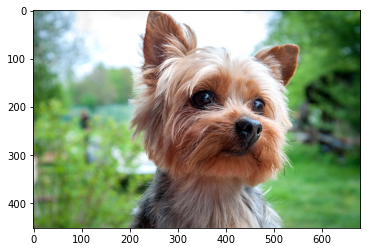

torch.Size([3, 512, 512])
torch.Size([1, 3, 512, 512])


In [6]:
# read and visualize an image
img = cv2.imread("images/dog.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
# define the transforms
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((512,512)),  # reszie the image as (1024, 1024) or (2048, 2048) to obtain high resolution features if you have large CPU or GPU memory
    transforms.ToTensor(),
])
img = np.array(img)
# apply the transforms
img = transform(img)
print(img.size())
# unsqueeze to add a batch dimension
img = img.unsqueeze(0)
print(img.size())

In [9]:
# pass the image through all the layers
results = []
results = [all_block[0](img)]
for i in range(1, len(all_block)-2):
    # pass the result from the last layer to the next layer
    #print(i)
    results.append(all_block[i](results[-1]))
# make a copy of the `results`
outputs = results

In [10]:
#outputs[0].shape

torch.Size([1024, 32, 32])
Saving layer 0 feature maps...


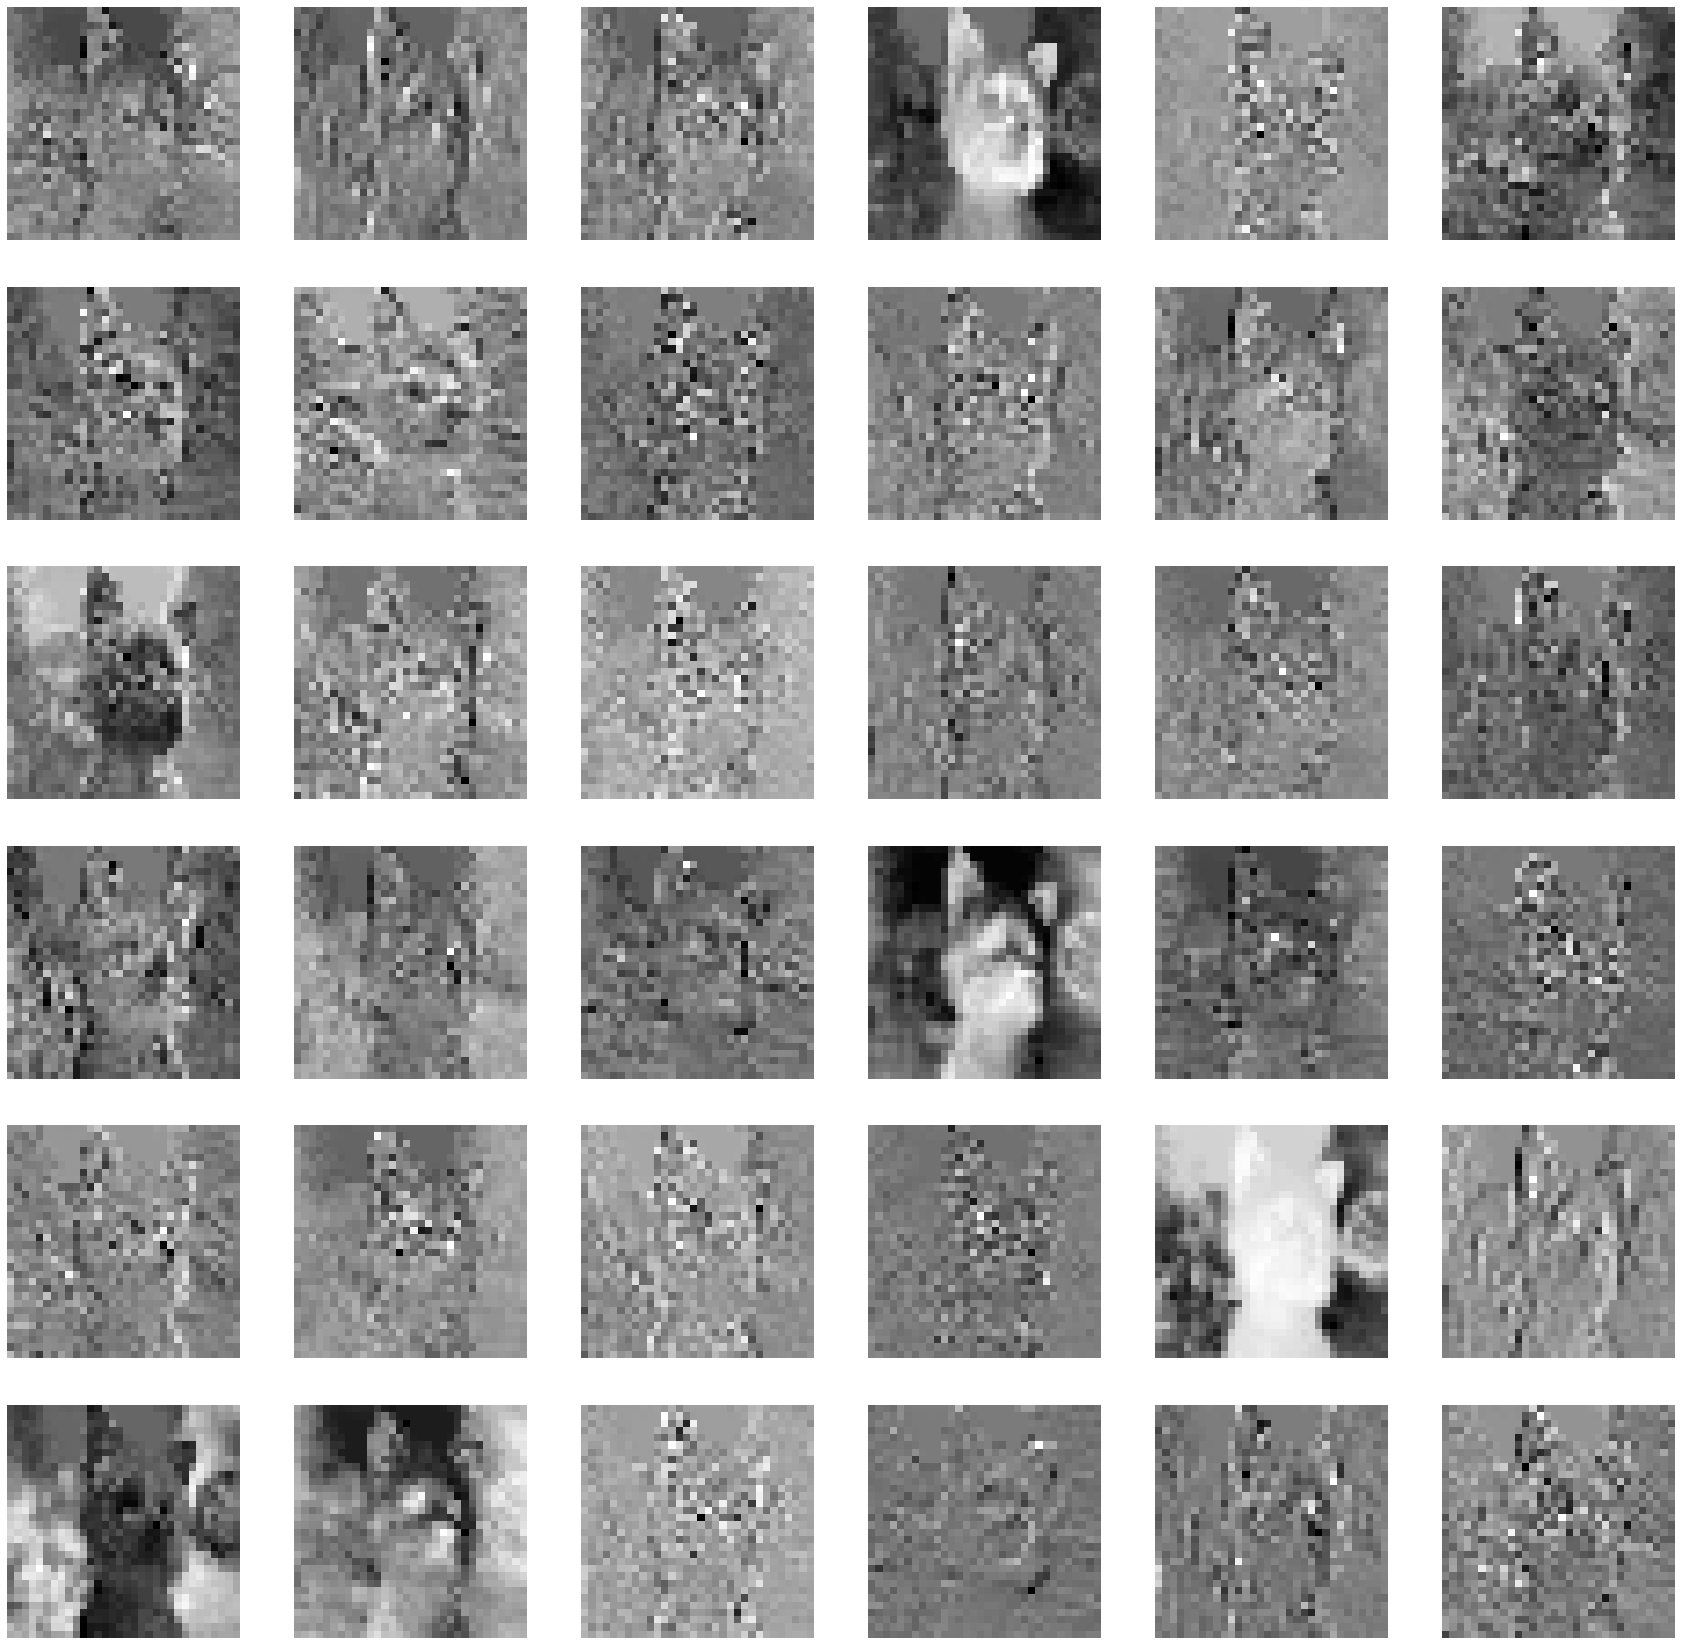

torch.Size([1024, 32, 32])
Saving layer 1 feature maps...


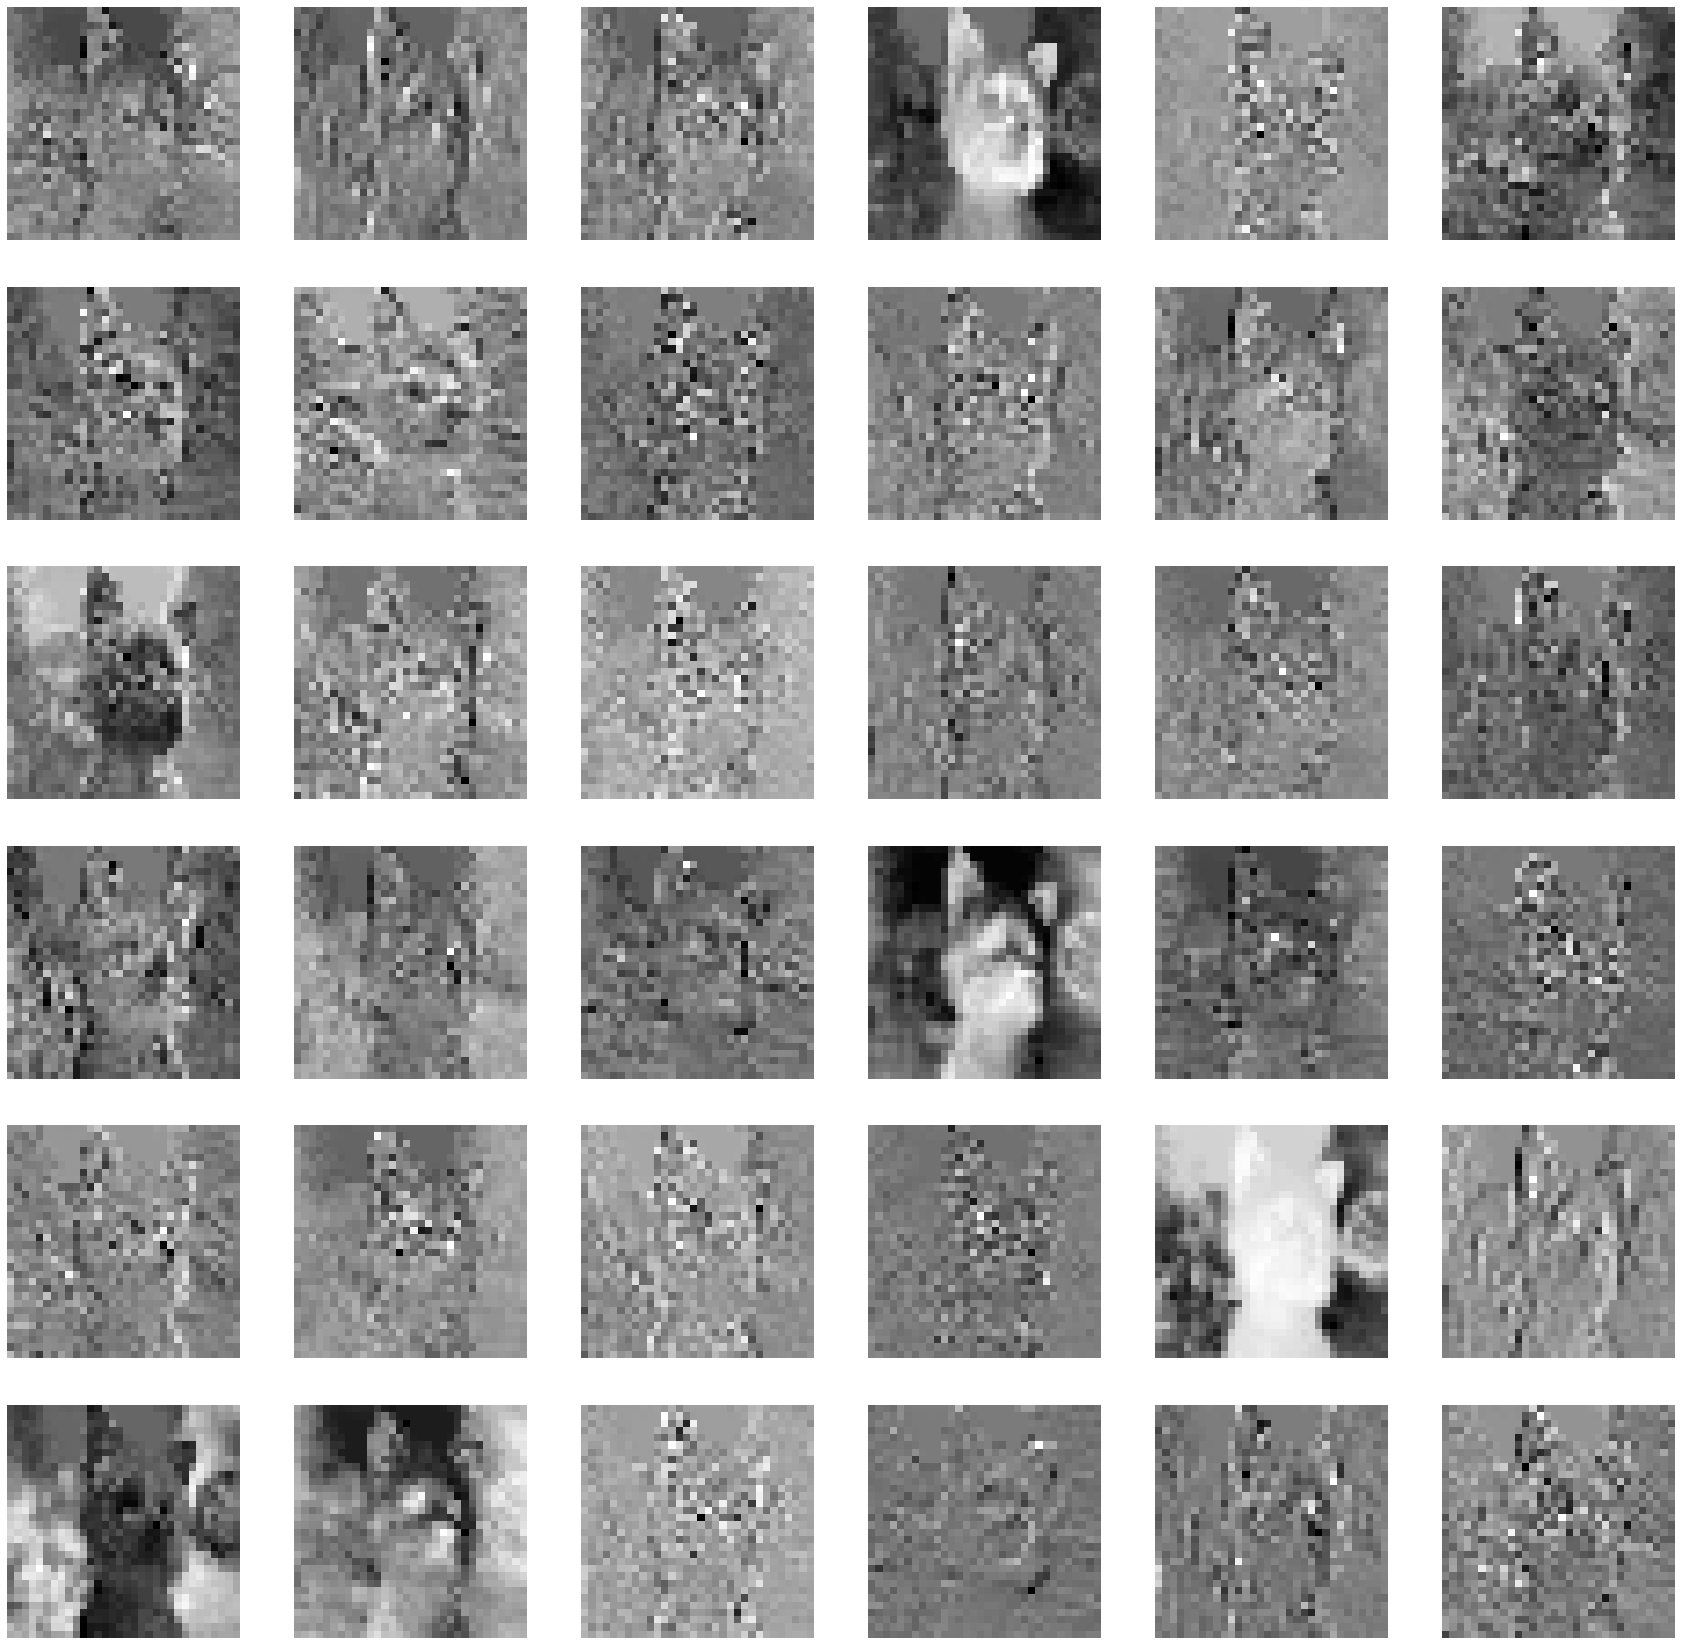

torch.Size([1024, 32, 32])
Saving layer 2 feature maps...


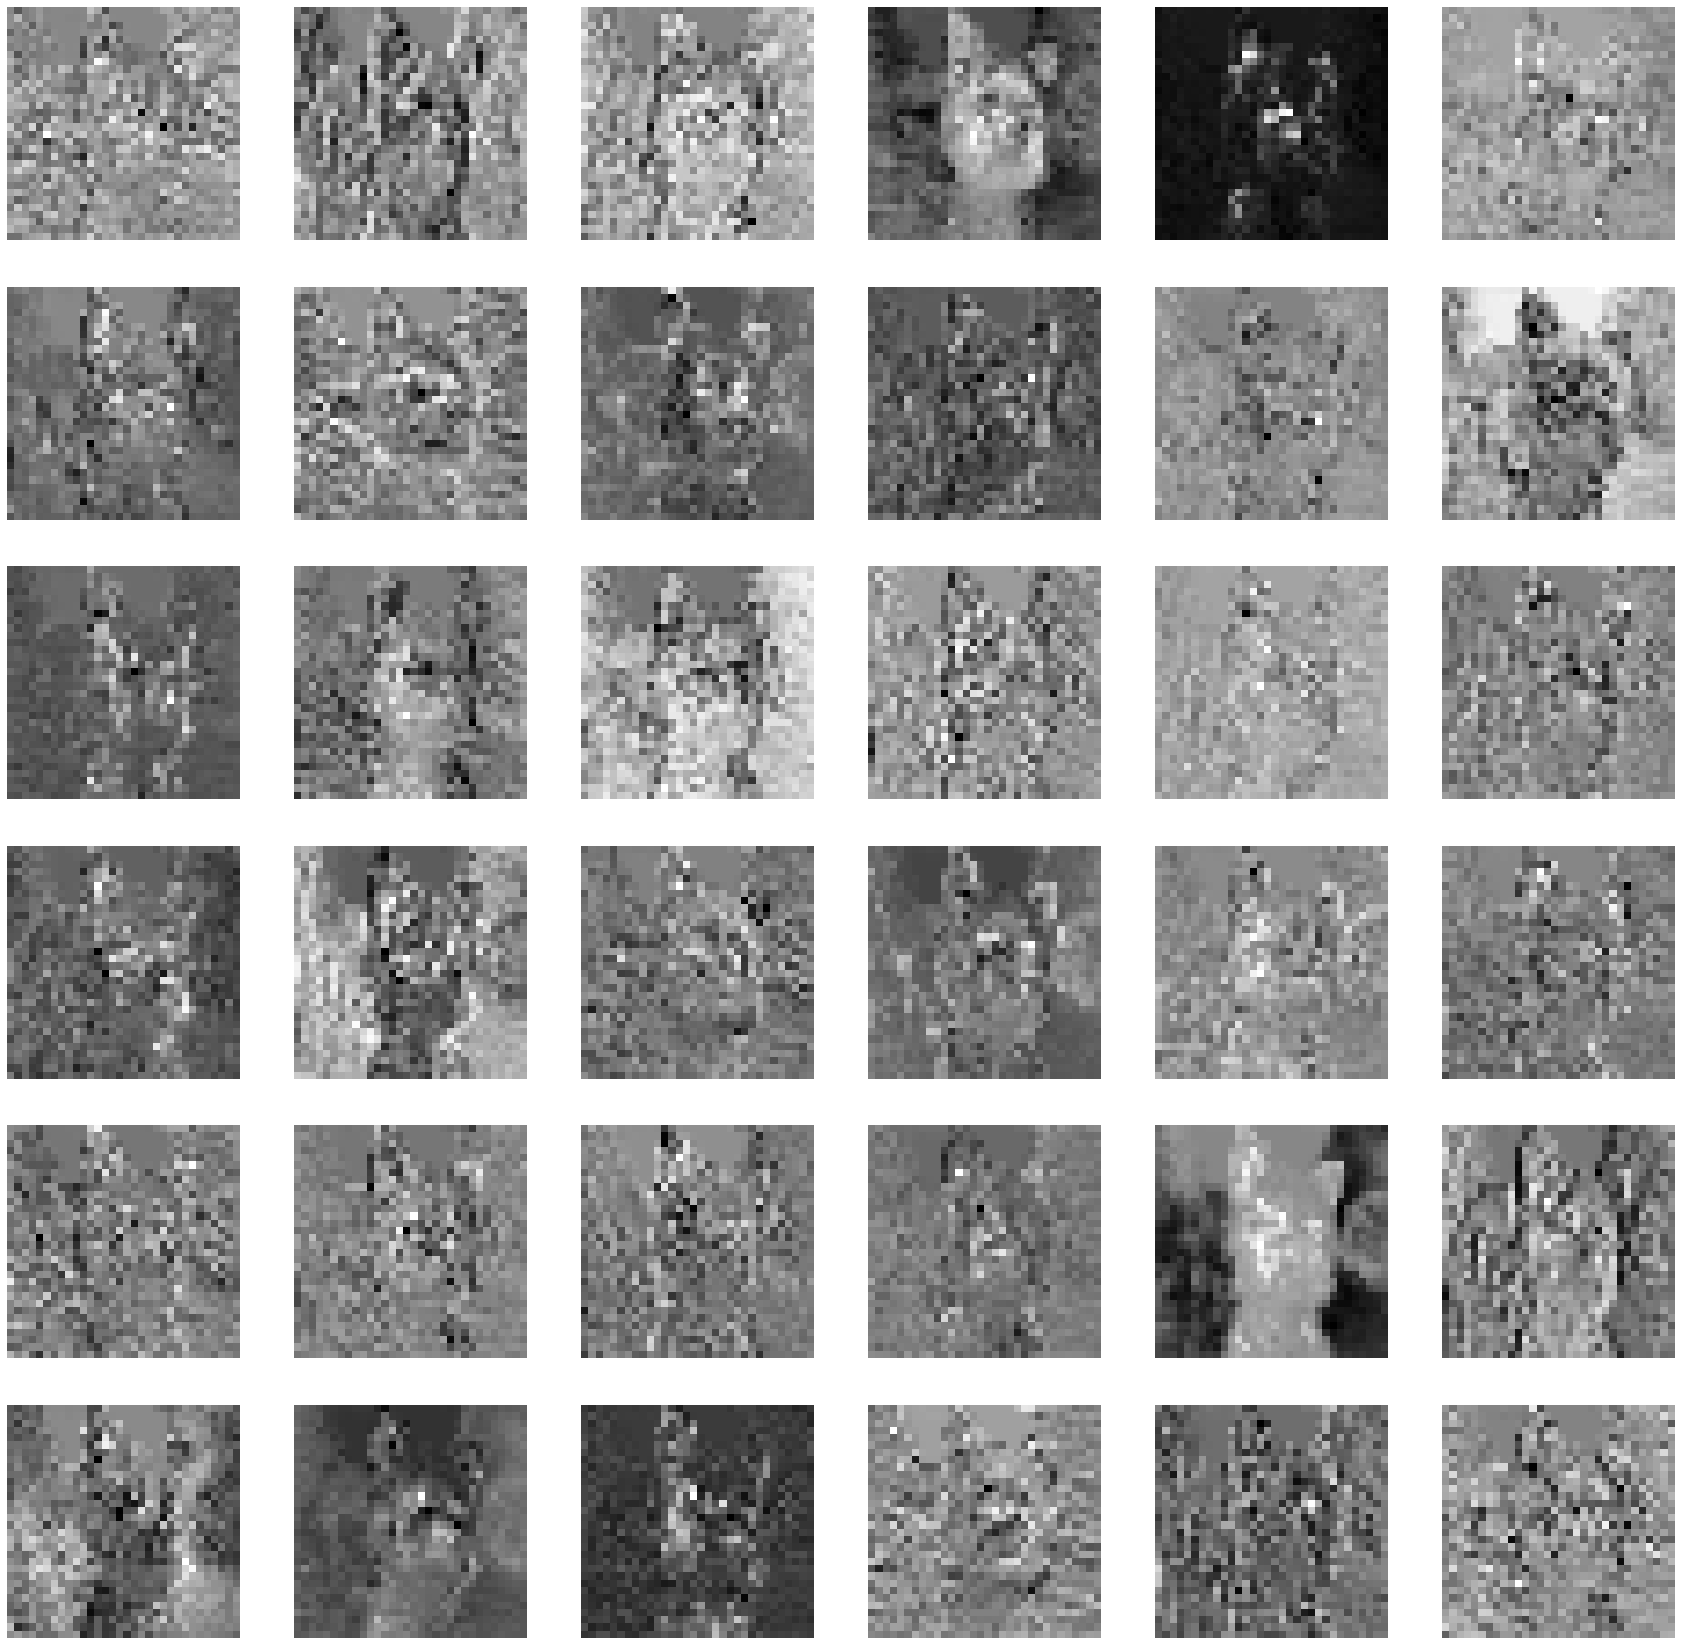

torch.Size([1024, 32, 32])
Saving layer 3 feature maps...


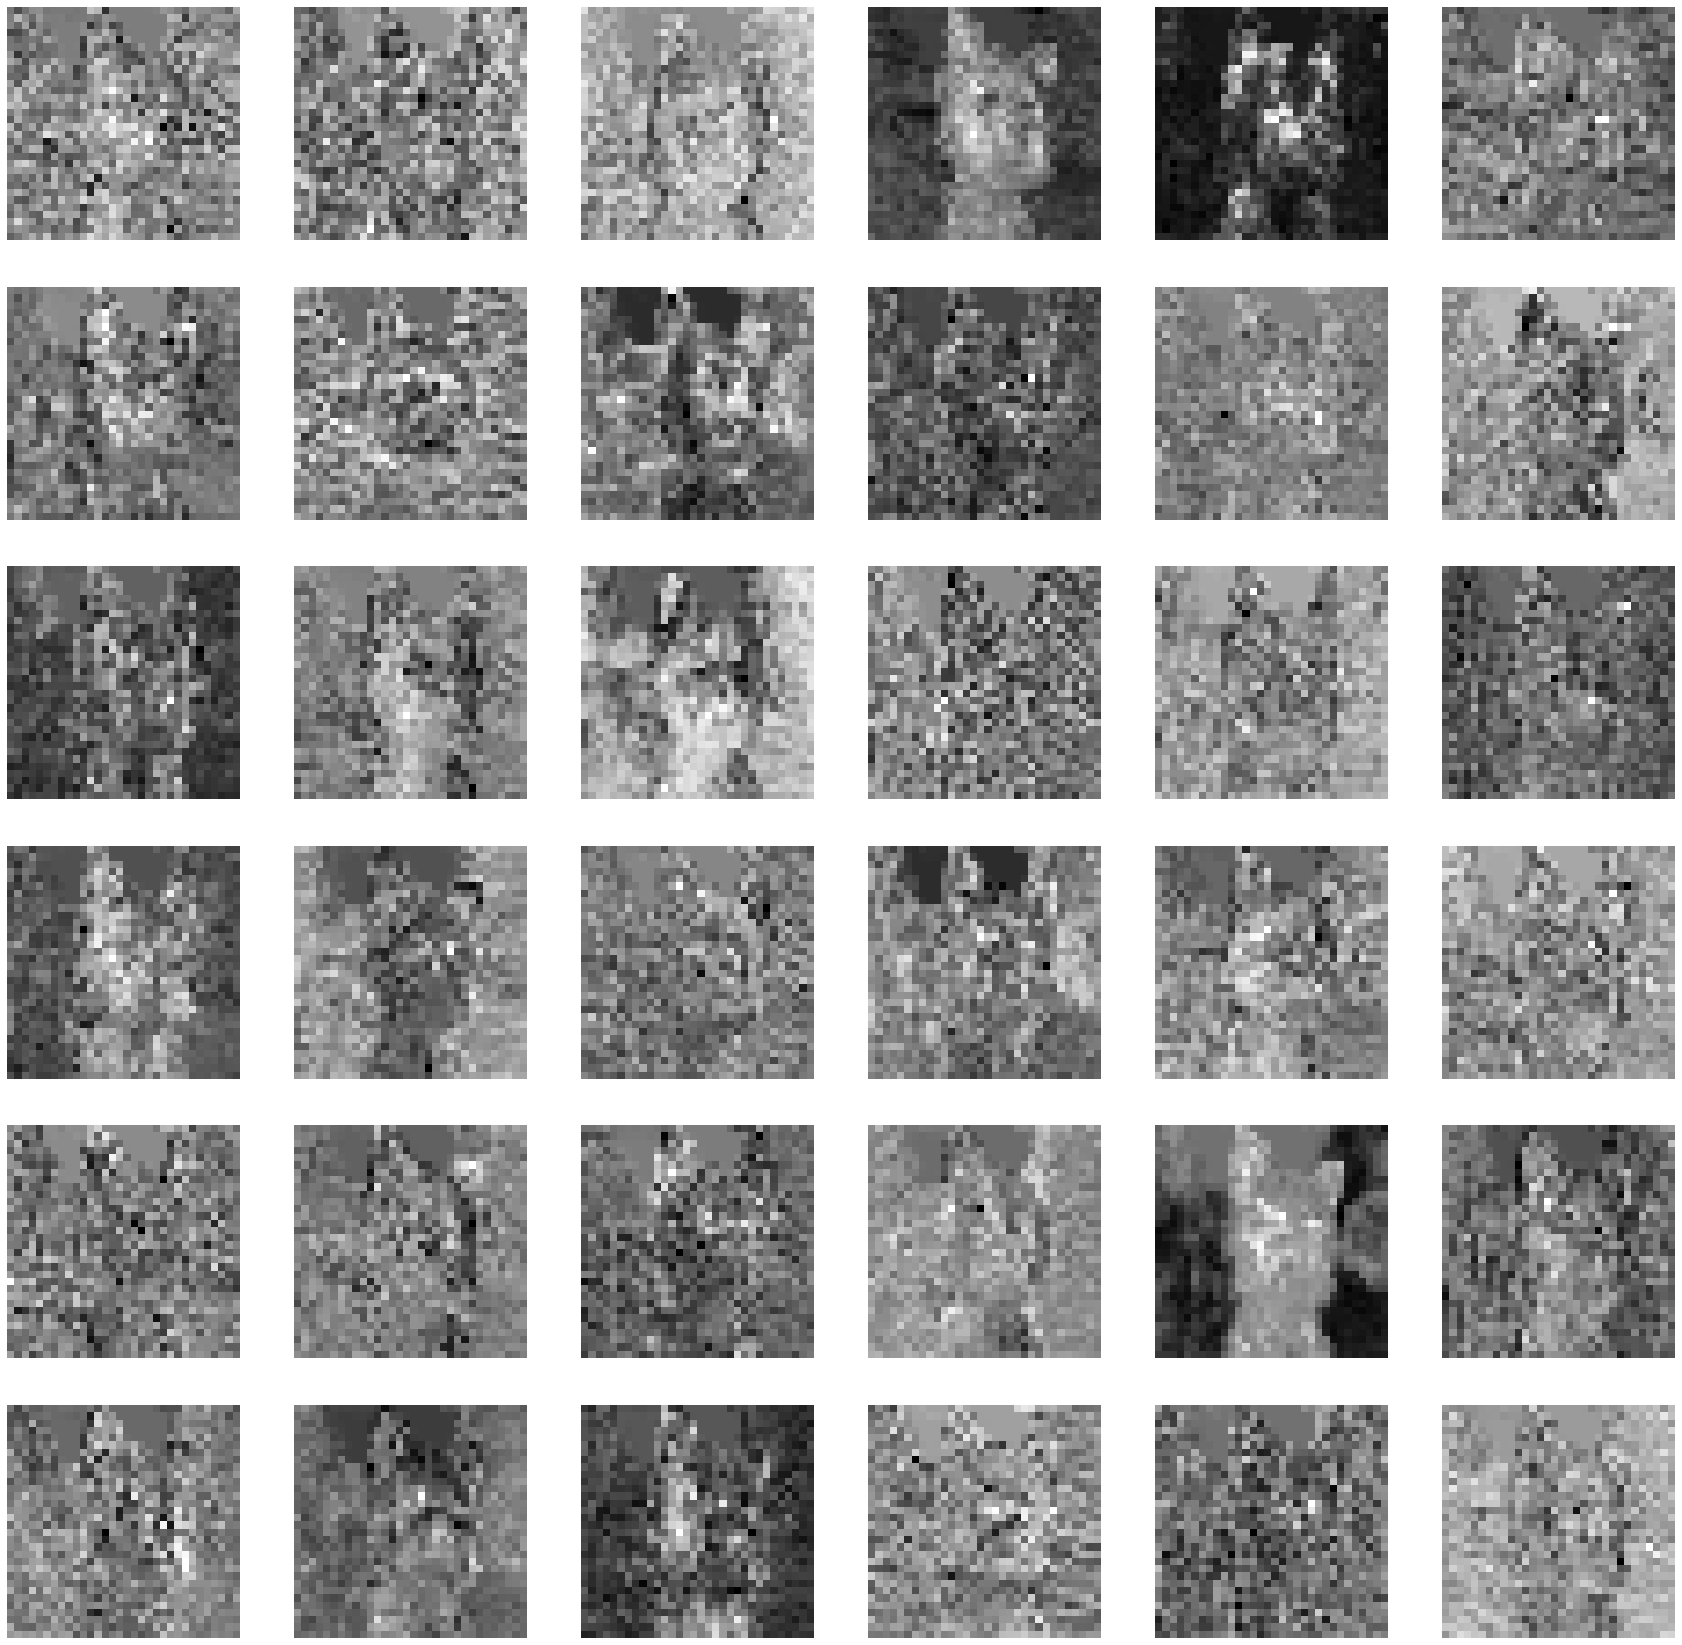

torch.Size([1024, 32, 32])
Saving layer 4 feature maps...


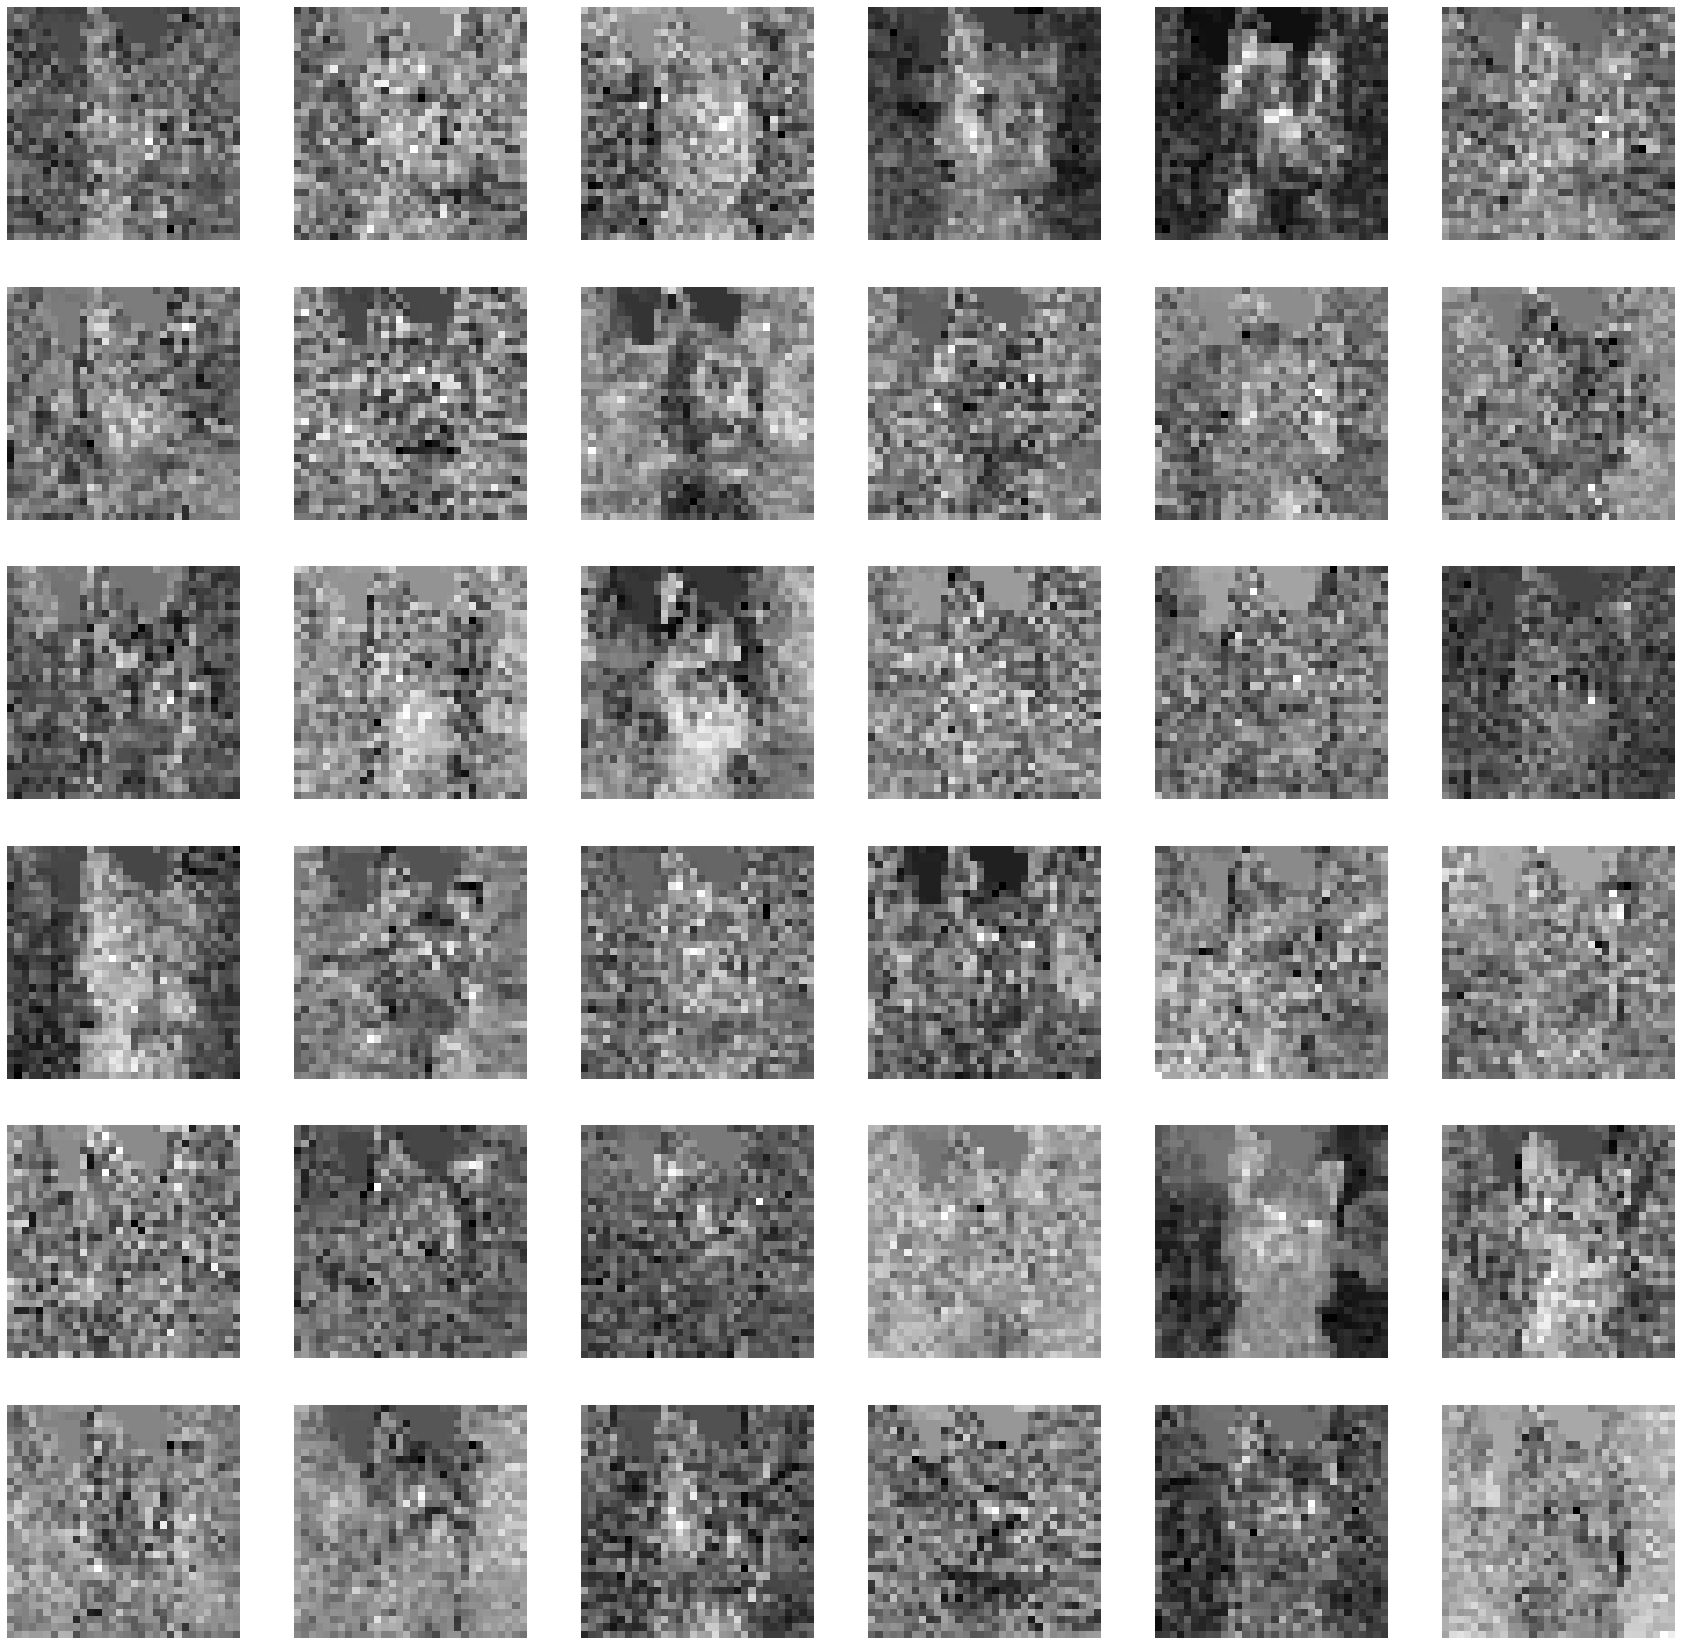

torch.Size([1024, 32, 32])
Saving layer 5 feature maps...


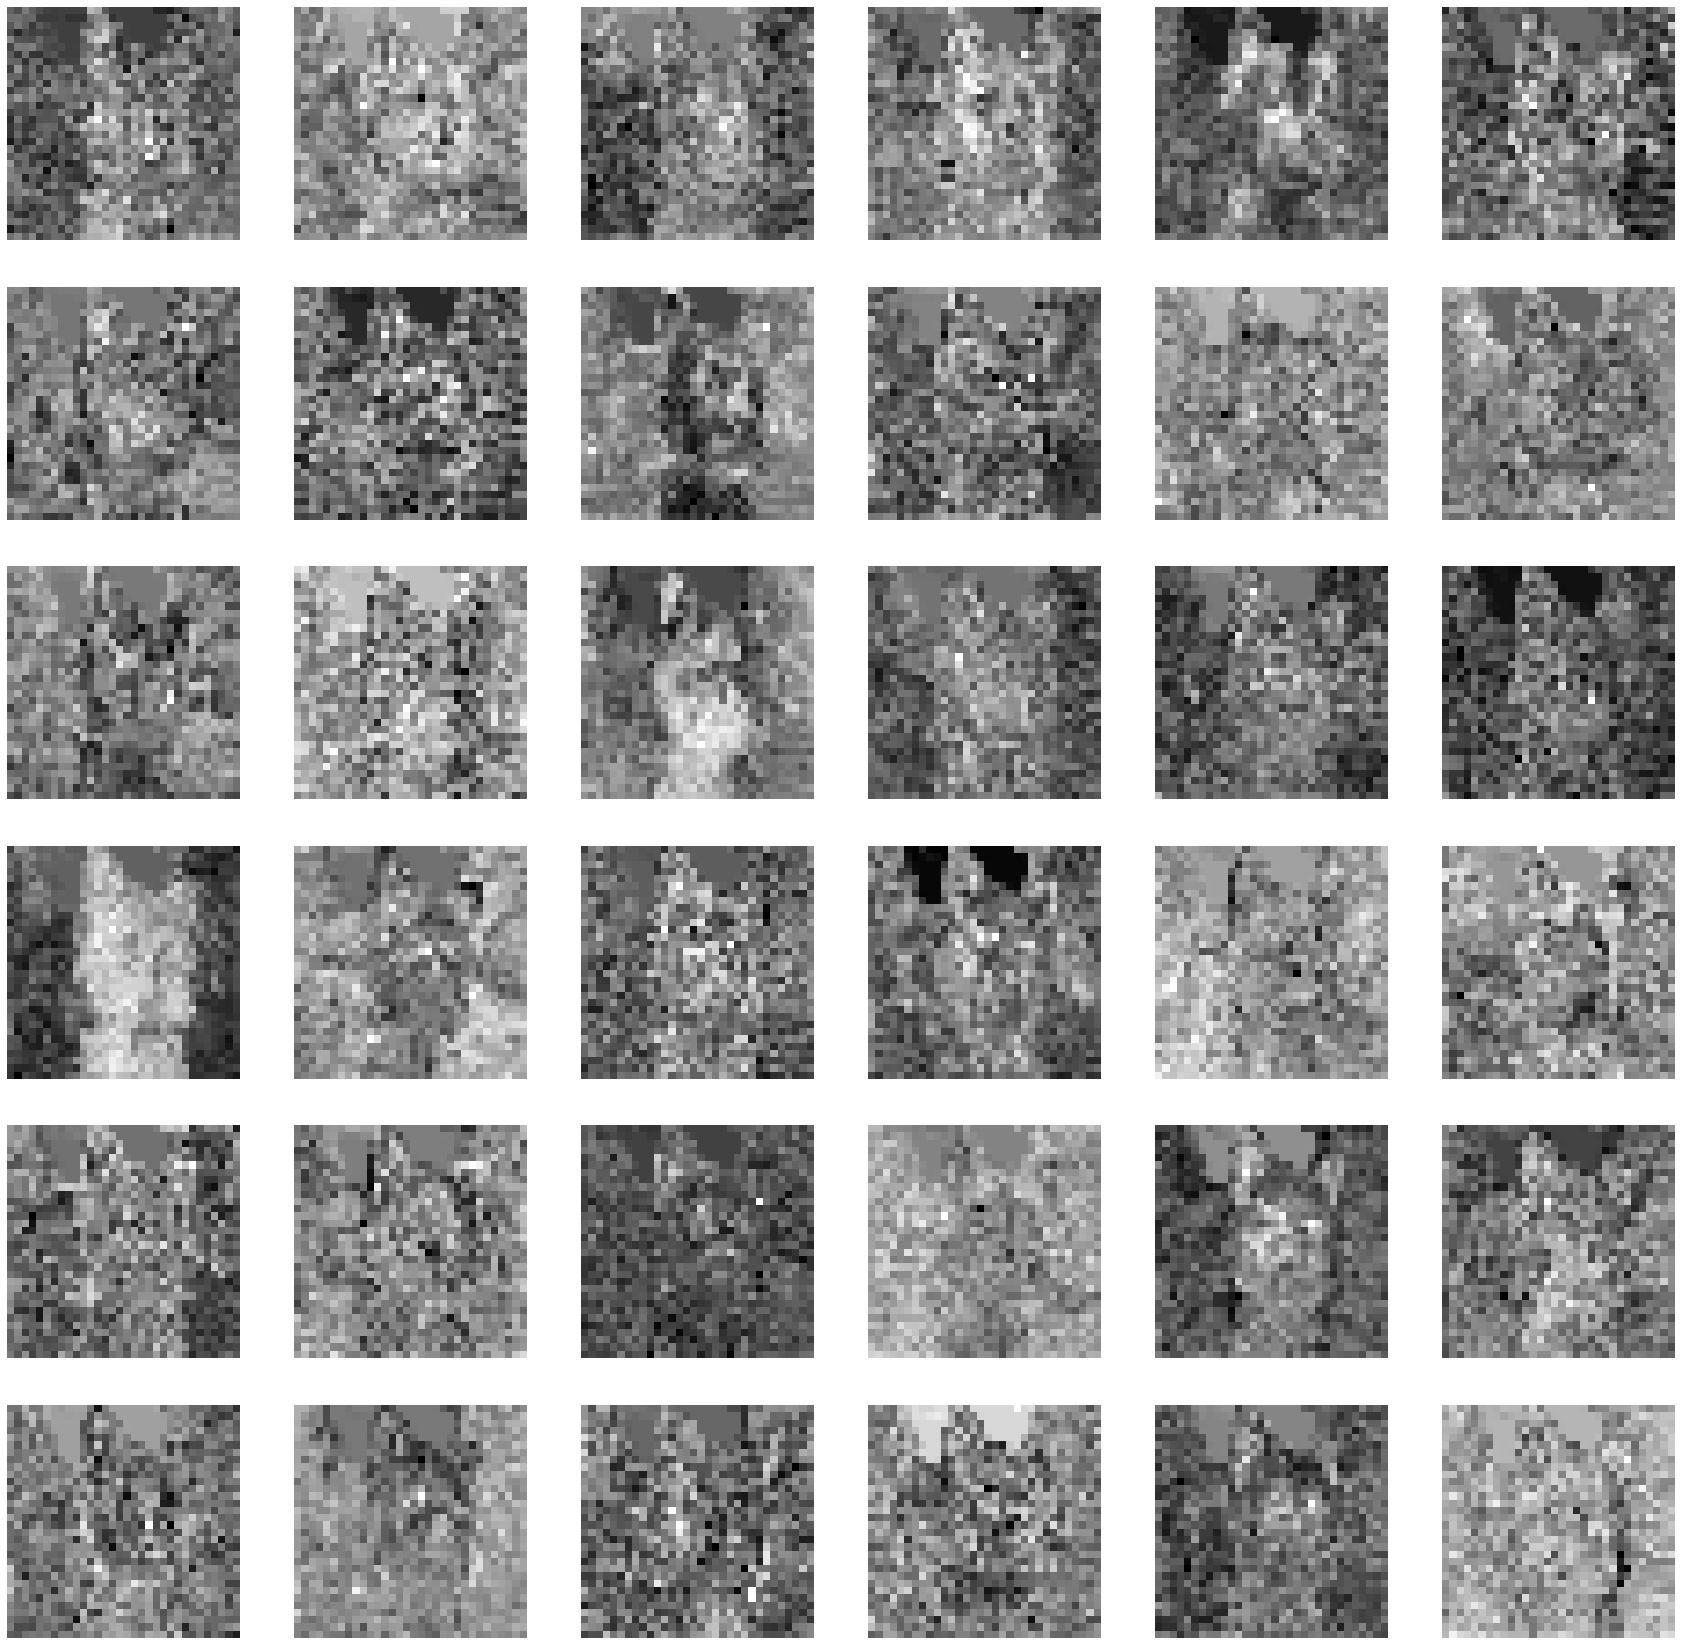

torch.Size([1024, 32, 32])
Saving layer 6 feature maps...


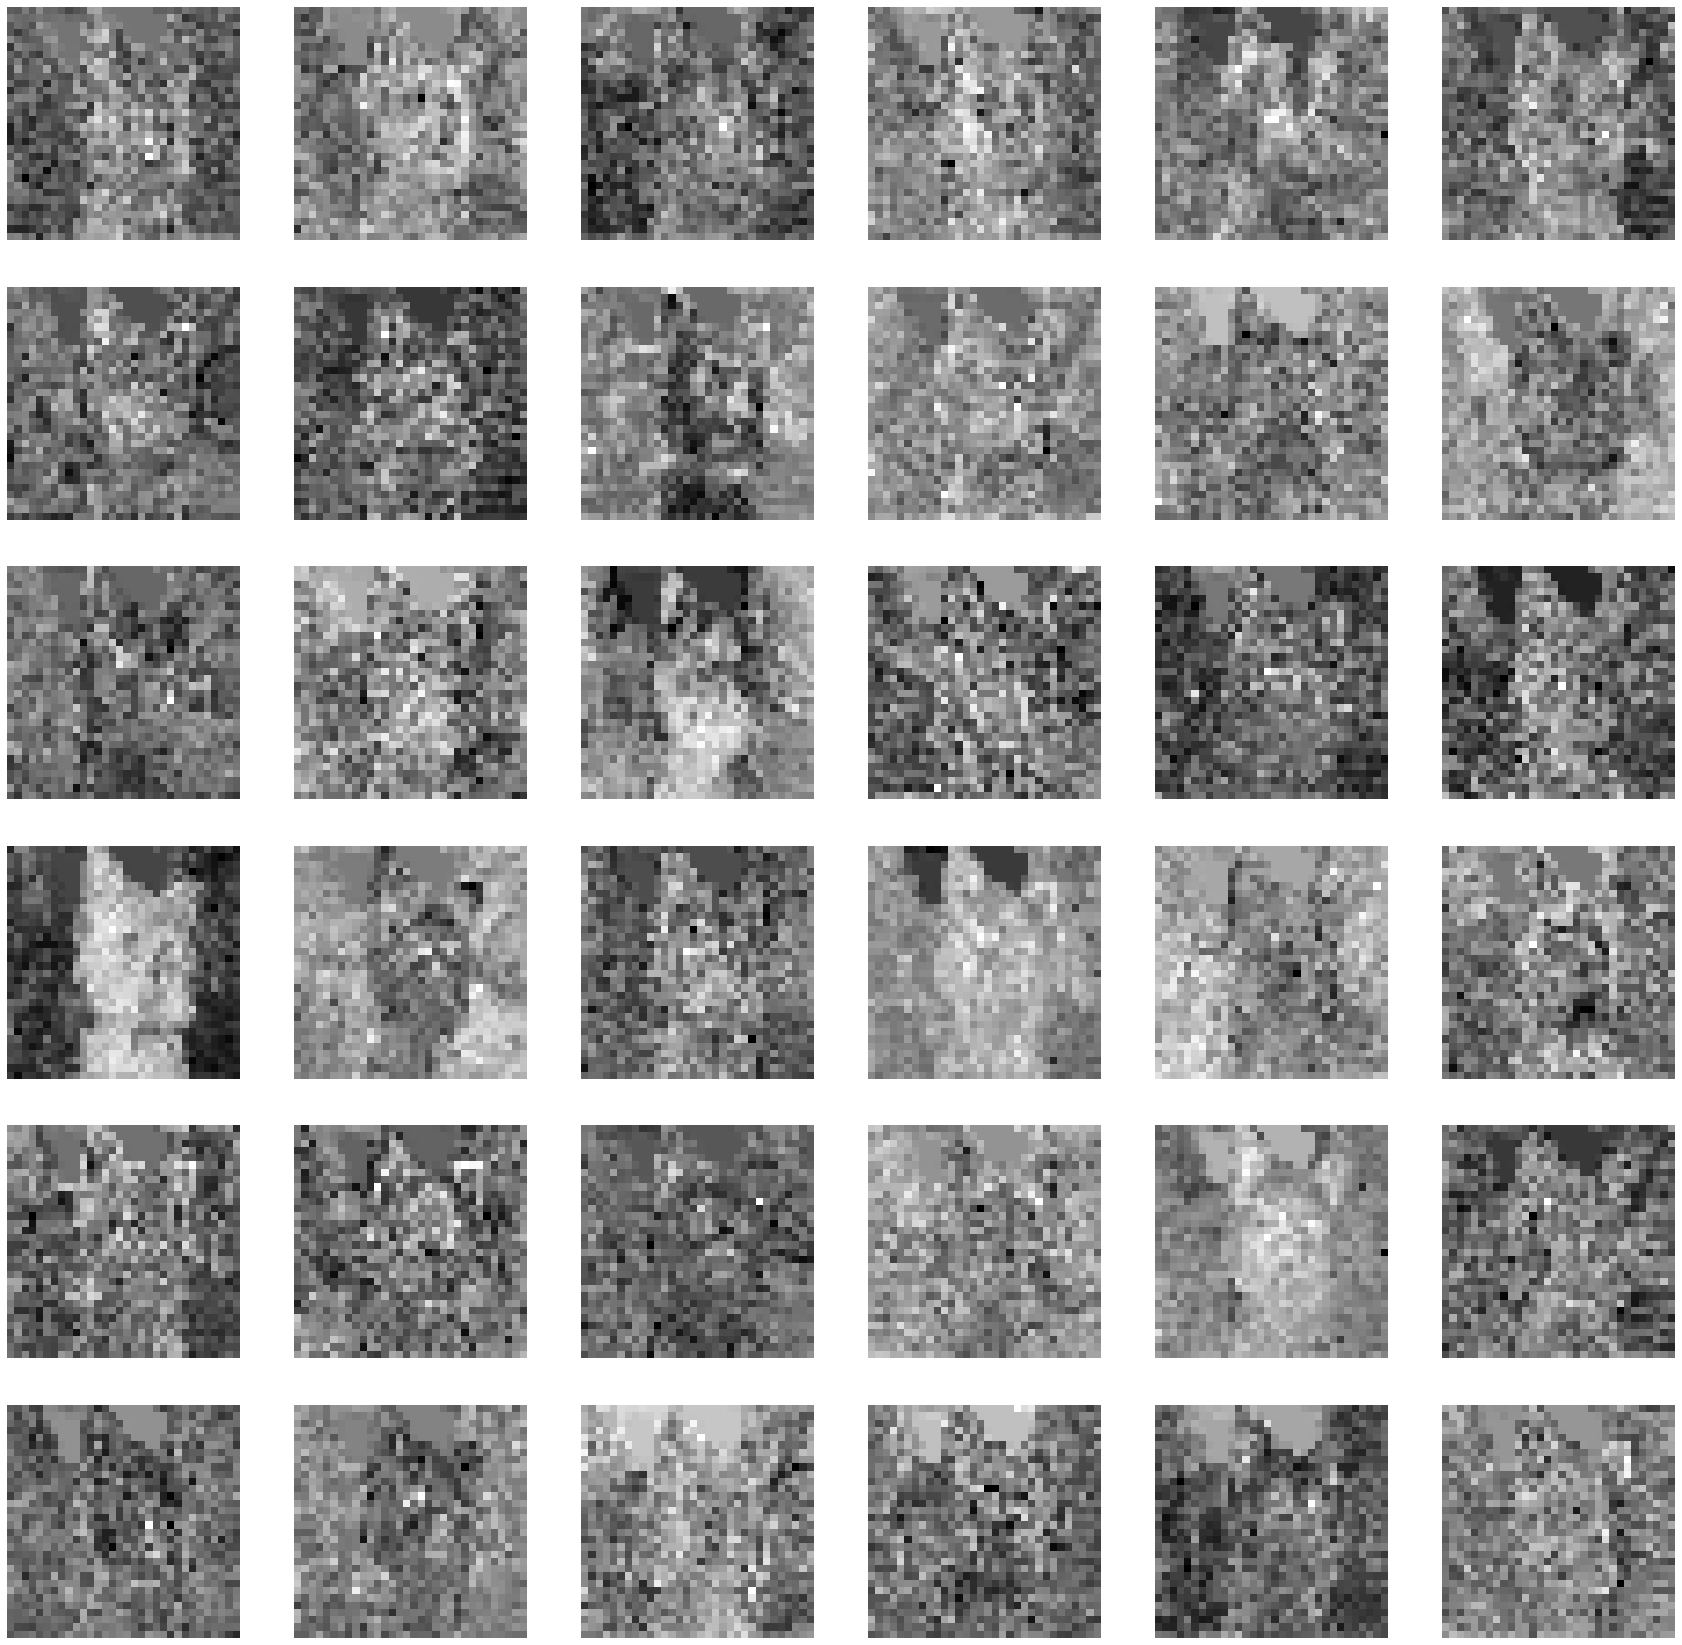

torch.Size([1024, 32, 32])
Saving layer 7 feature maps...


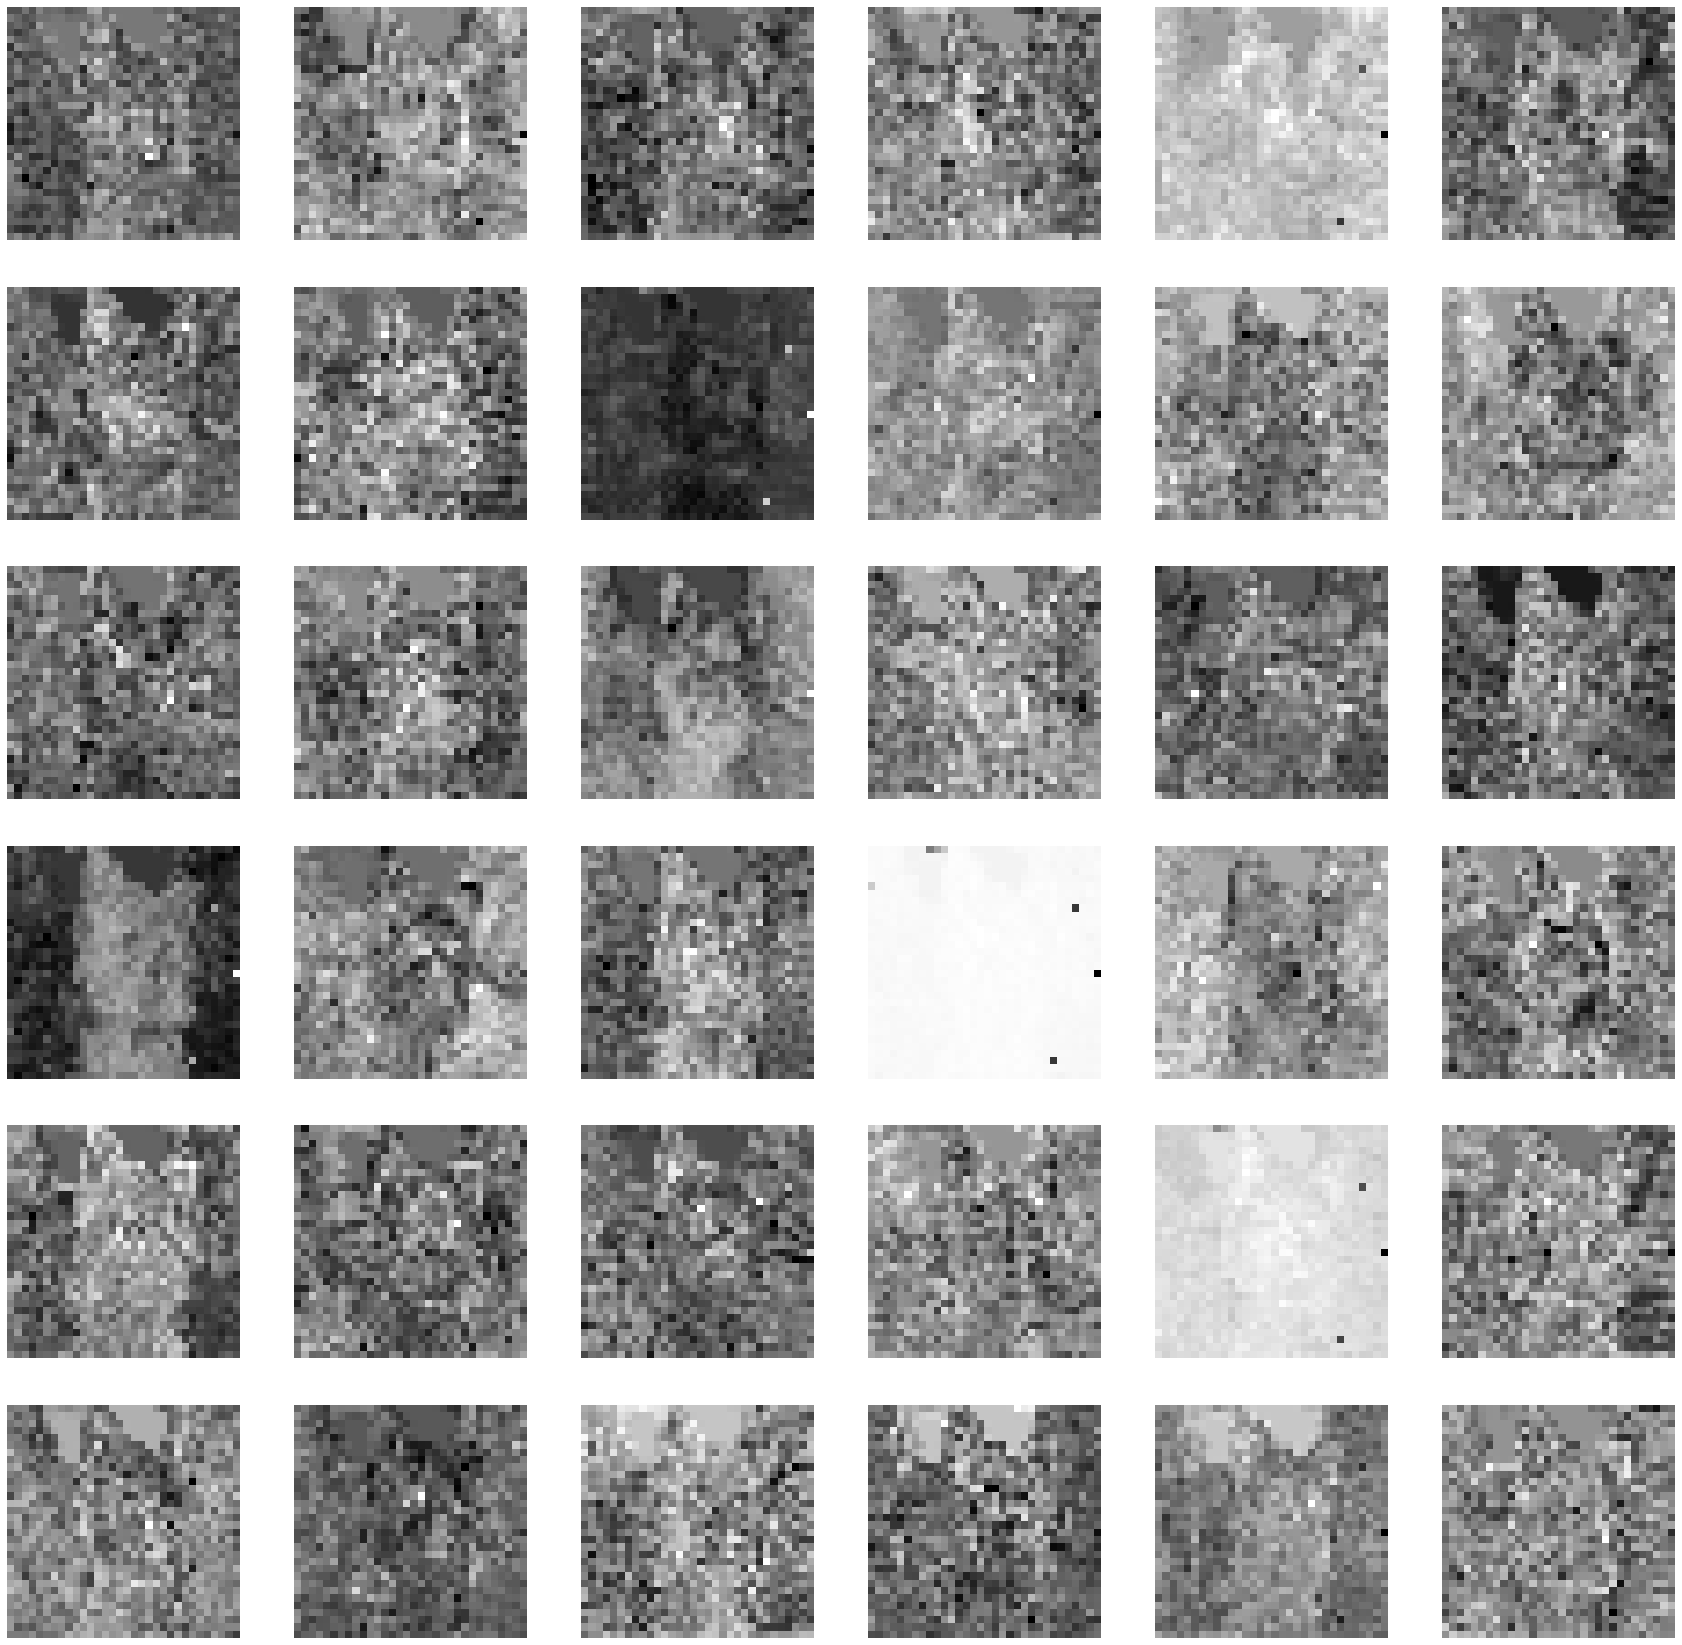

torch.Size([1024, 32, 32])
Saving layer 8 feature maps...


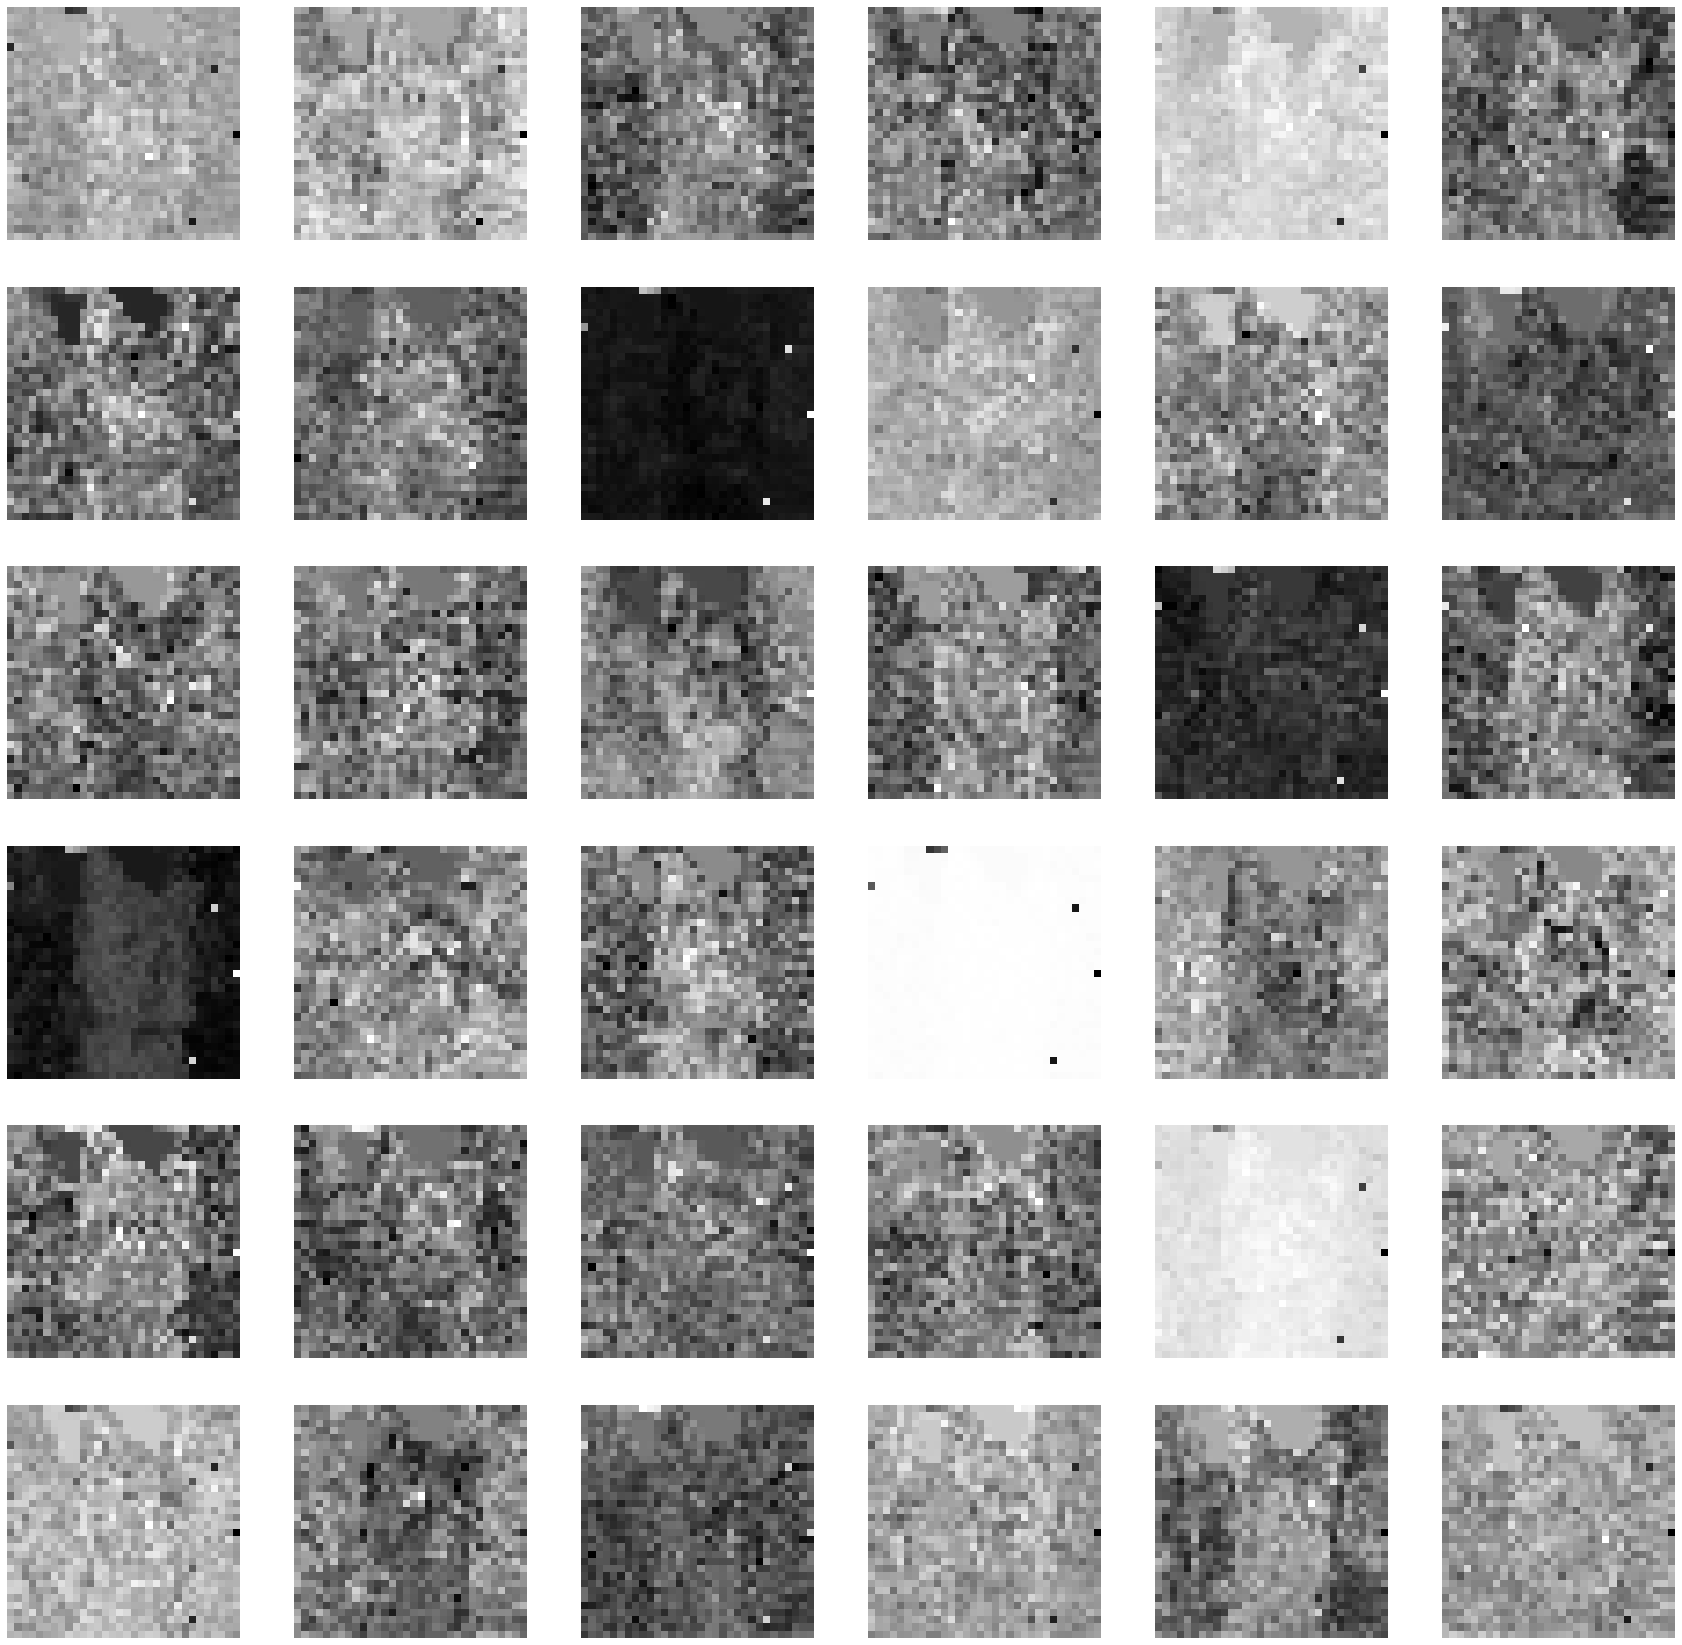

torch.Size([1024, 32, 32])
Saving layer 9 feature maps...


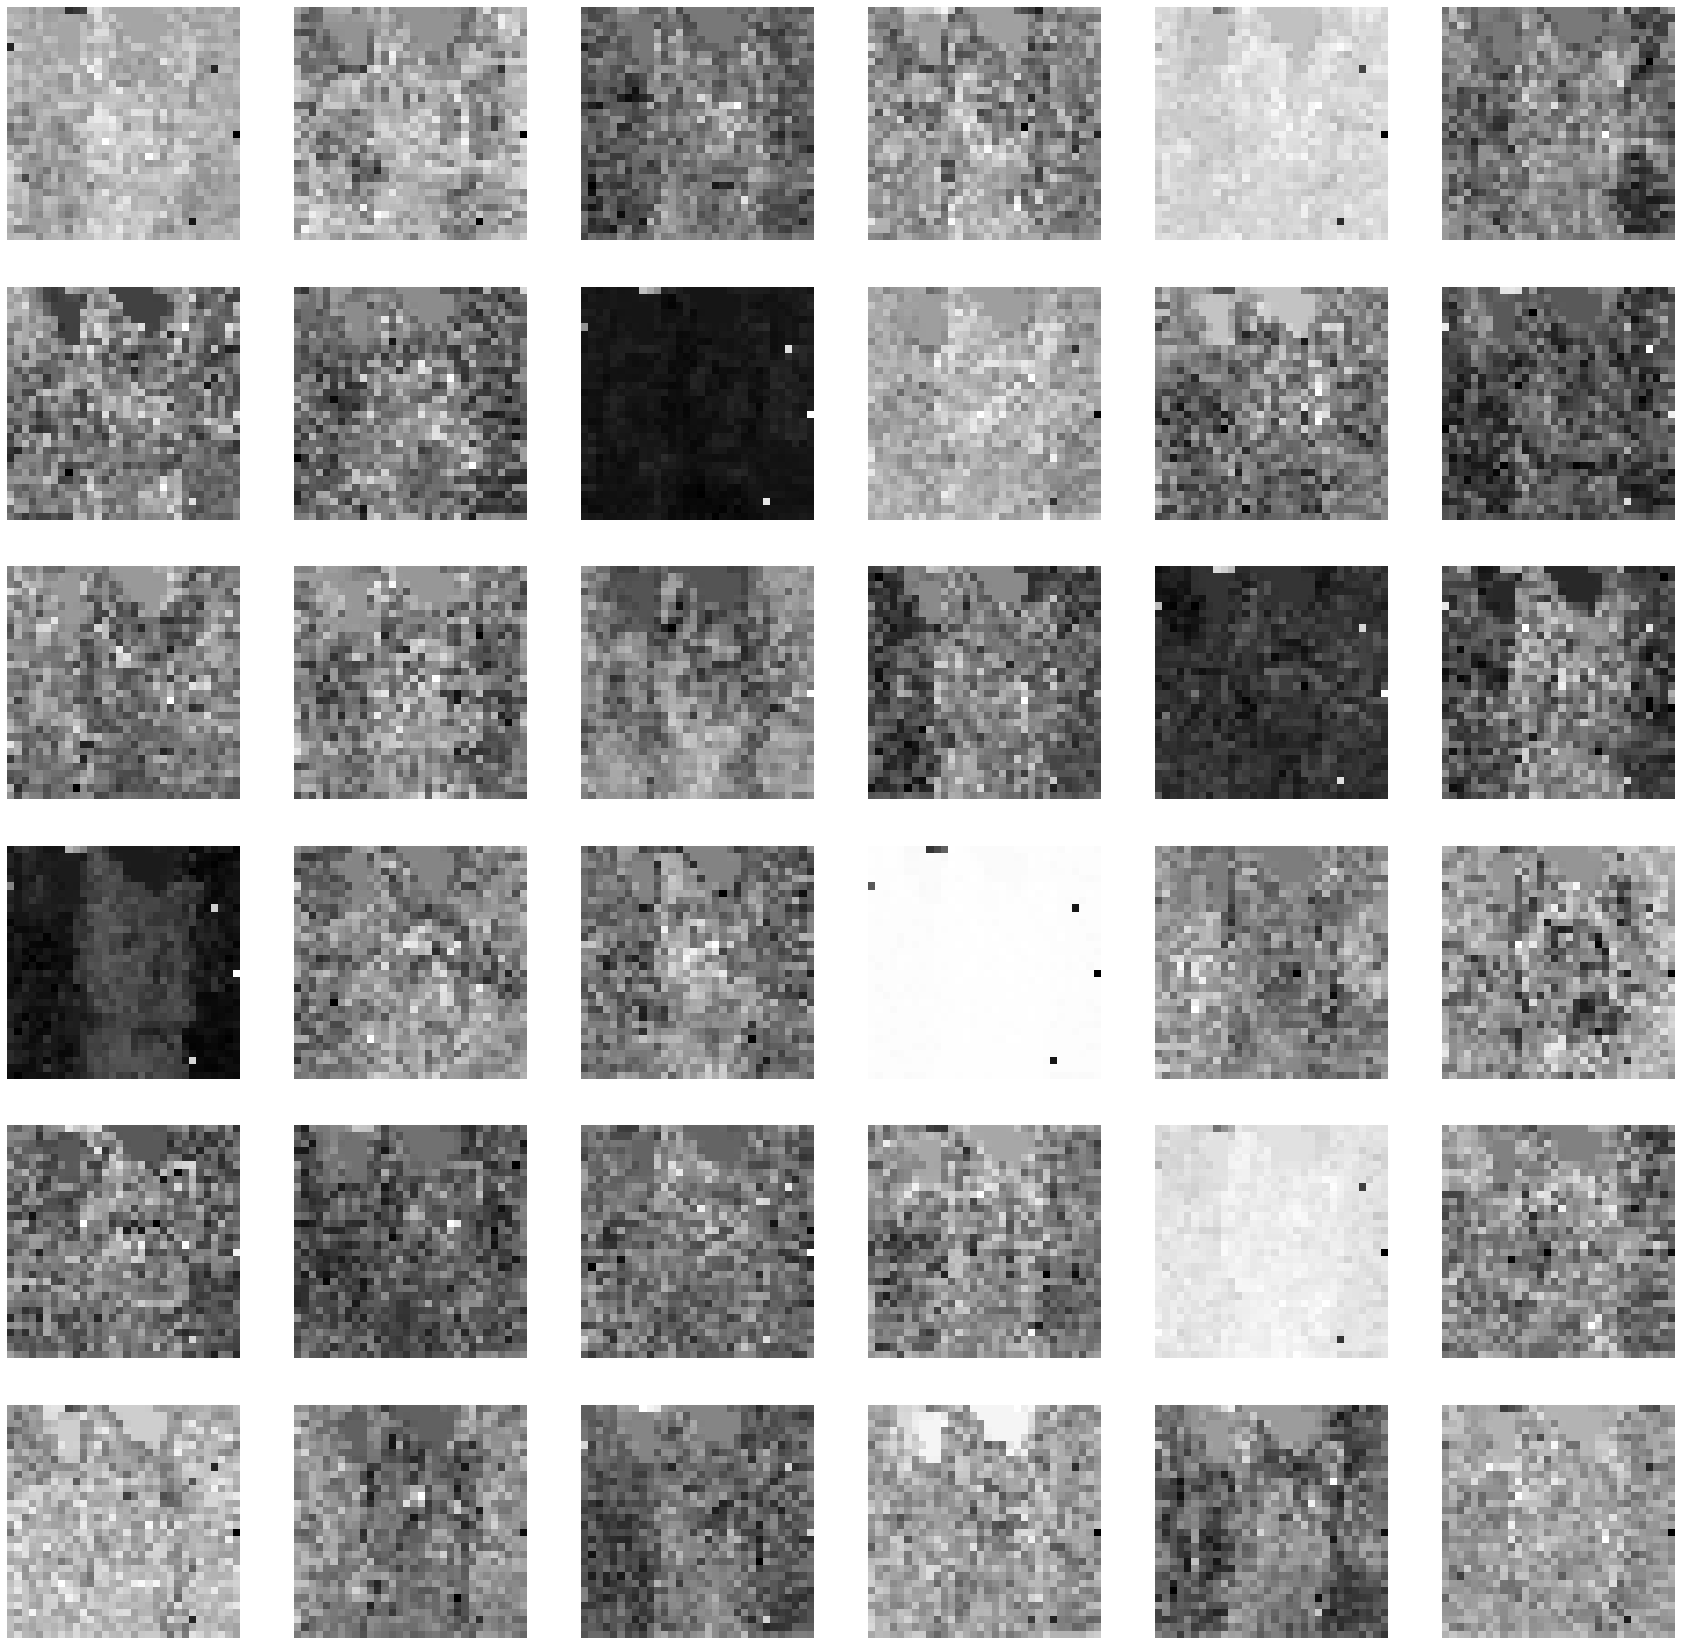

torch.Size([1024, 32, 32])
Saving layer 10 feature maps...


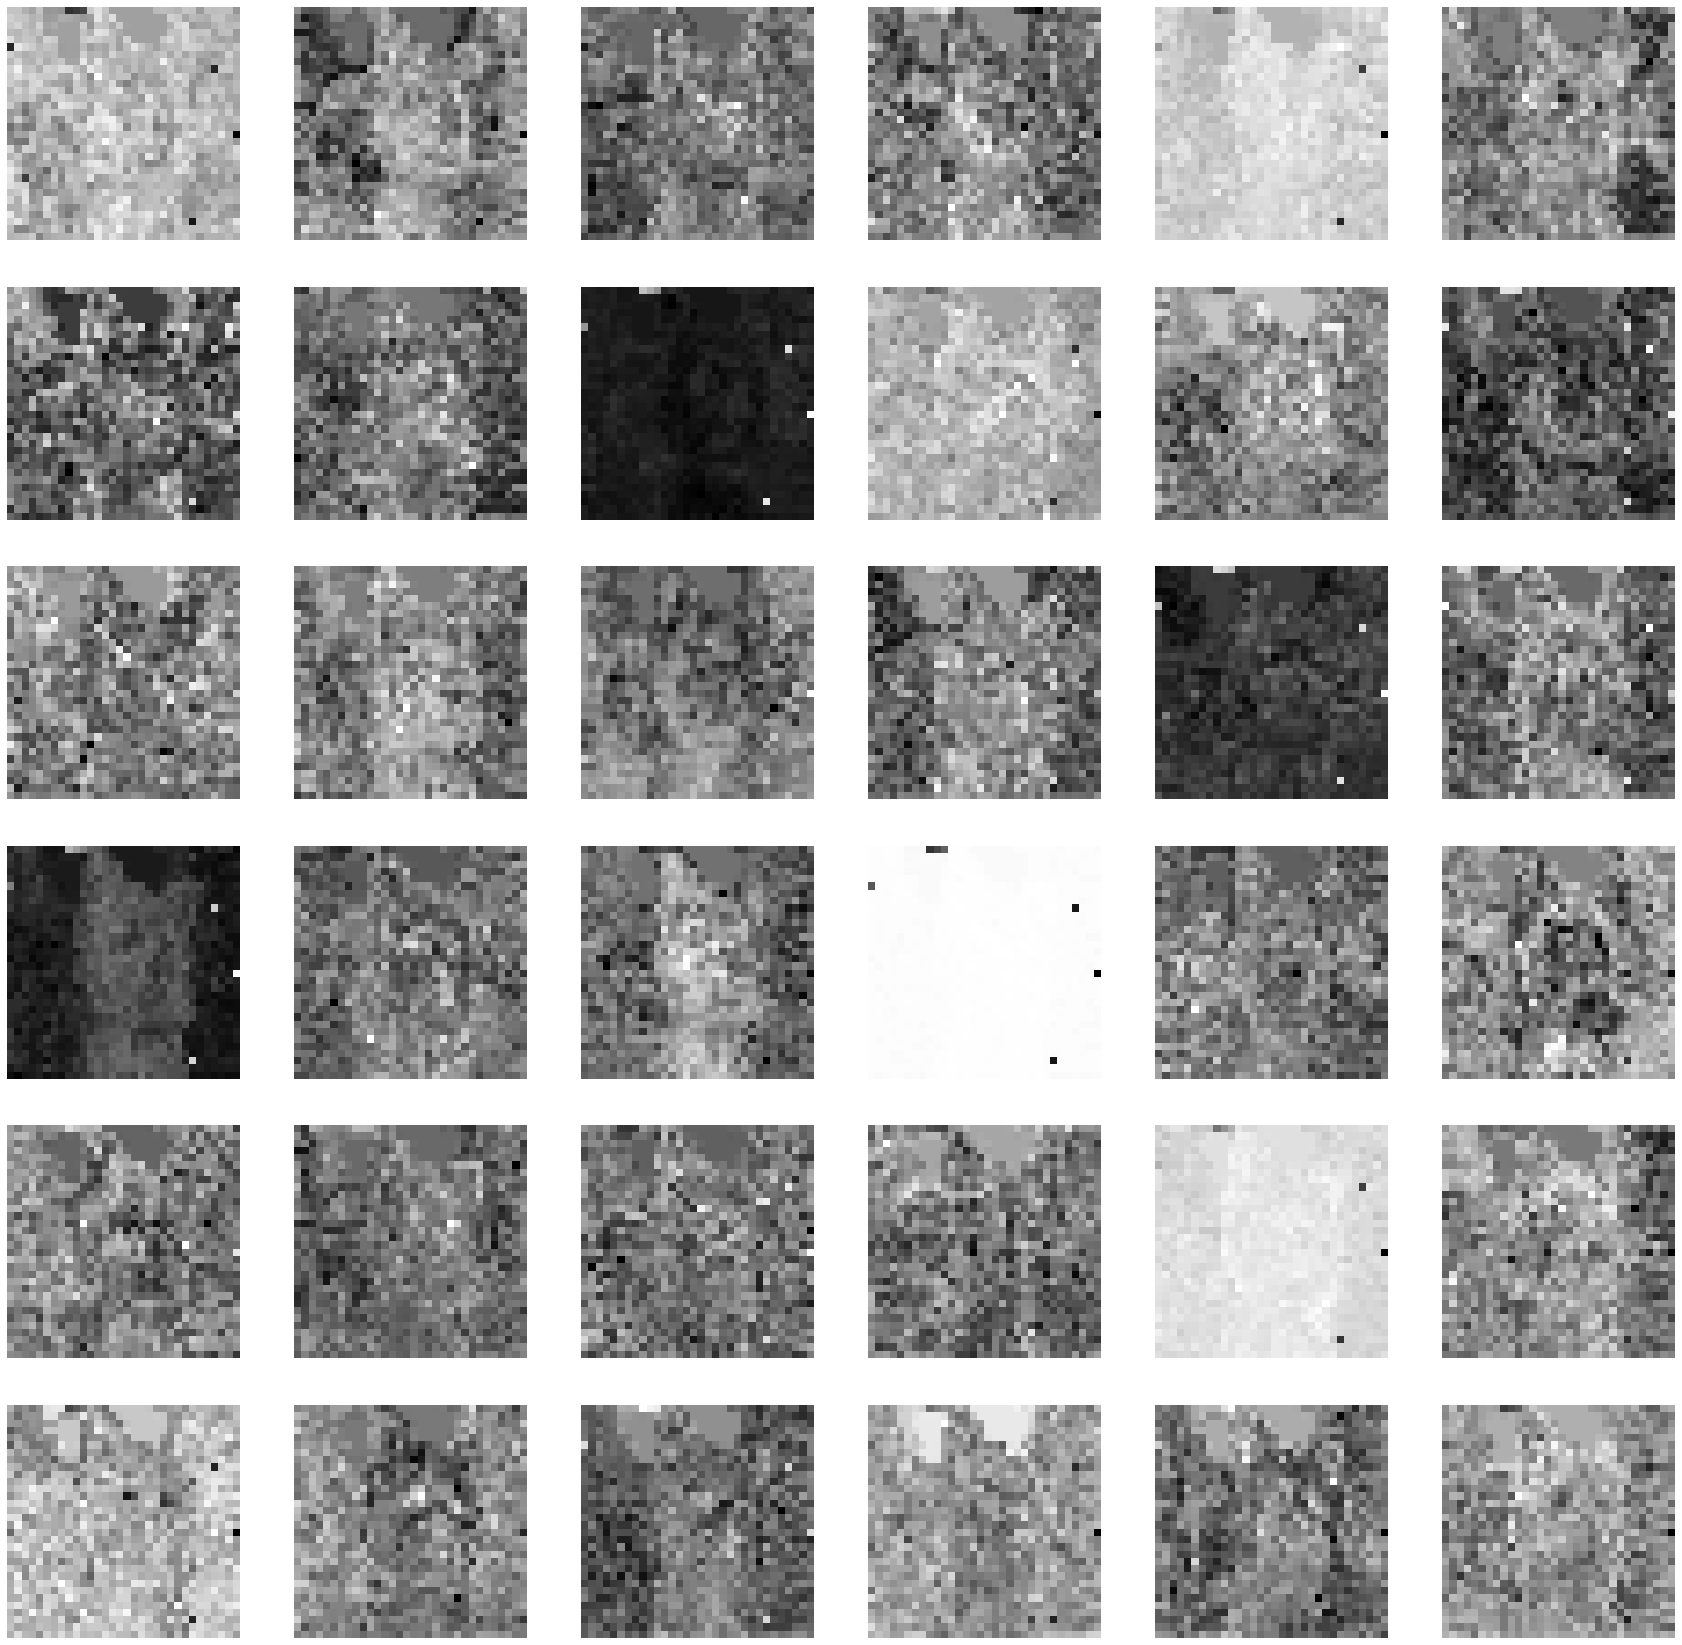

torch.Size([1024, 32, 32])
Saving layer 11 feature maps...


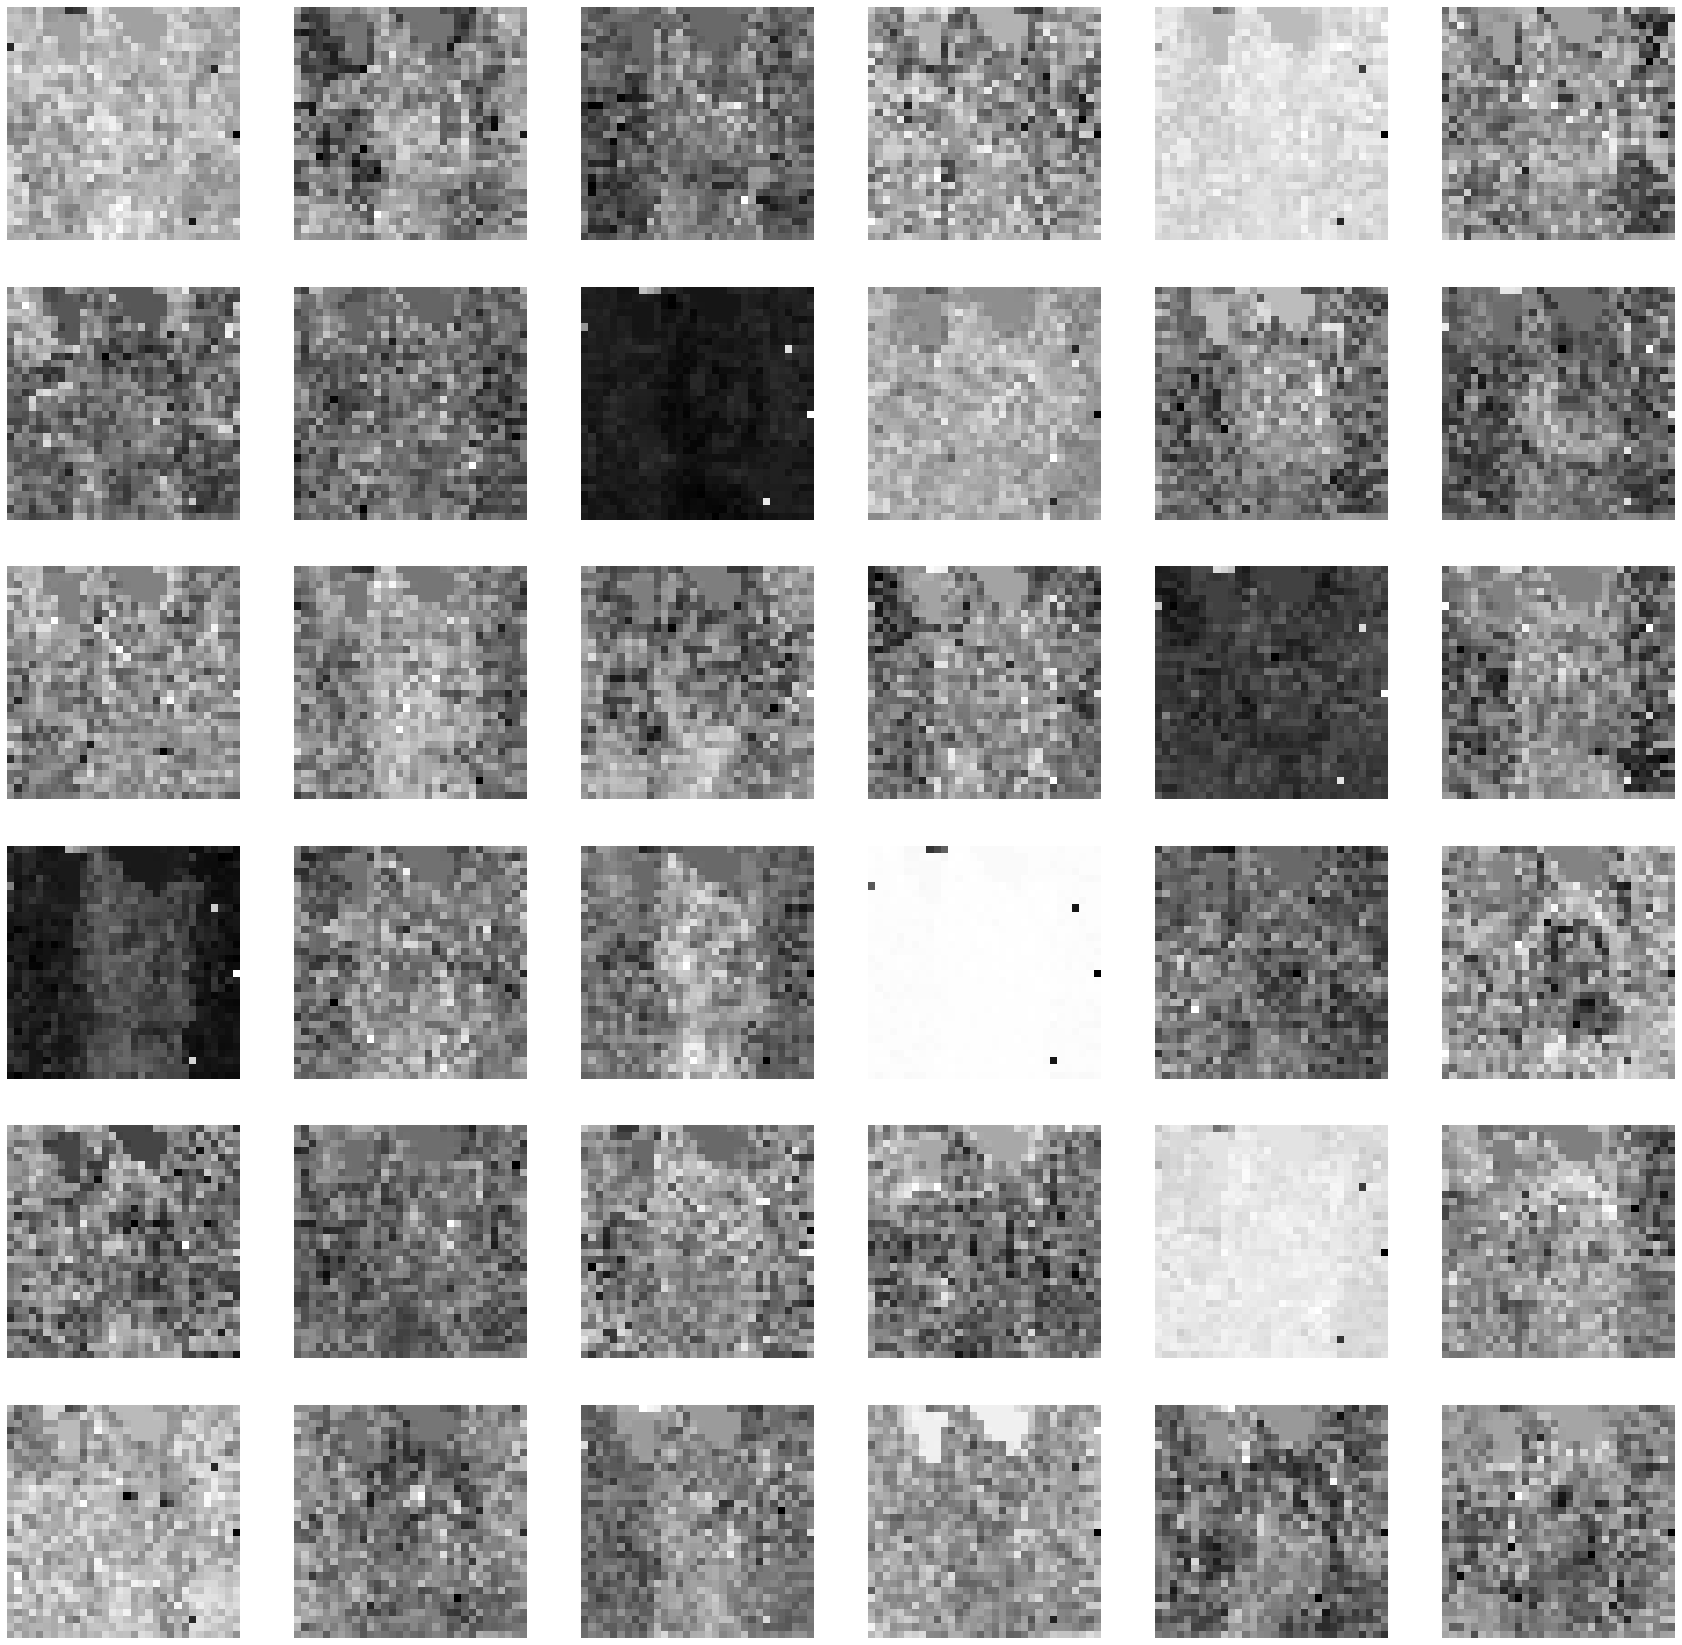

In [11]:
# visualize 36 features from each layer 
# (although there are more feature maps in the upper layers)
all_layers_num = 12   # change the number of length to control how many layers you want to visualize
for num_layer in range(all_layers_num): 
    plt.figure(figsize=(30, 30))
    layer_viz = outputs[num_layer]#[0, :, :, :]
    layer_viz = layer_viz.data
    layer_viz = layer_viz.squeeze(0).transpose(0, 1)
    layer_viz = layer_viz.reshape(1024, 32, 32)  # chage the reshape here
    print(layer_viz.size())
    for i, filter in enumerate(layer_viz):
        if i == 36: # we will visualize only 8x8 blocks from each layer
            break
        plt.subplot(6, 6, i + 1)
        plt.imshow(filter, cmap='gray')
        plt.axis("off")
    print(f"Saving layer {num_layer} feature maps...")
    plt.savefig(f"data/outputs/vit/layer_{num_layer}.png")  # change the path to save the feature maps
    plt.show()
    plt.close()